In [1]:
from fit_param import test
import matplotlib.pyplot as plt
import numpy as np
import os
from average_dTb import average_dTb, dTb_random_v_stream

In [3]:
# for m_chi in np.logspace(-2, 0, 3):
#     for V_rms in np.linspace(20000, 40000, 3):
#         param_fits = test([m_chi, V_rms], param_guess=[0.01, 29000], cores=1, repeat=20, plot=False, average_dir = 'average_dTb', delete_if_exists=False)

100 points; m,V=(0.03162277660168379, 0.031809923166377256), (35000, 34977.52662469645)
100 points; m,V=(0.01, 0.00991728173286823), (22500, 22581.670849352497)
100 points; m,V=(0.1, 0.10017496325991519), (32500, 32479.9575269242)
100 points; m,V=(0.5623413251903491, 0.5621763593988933), (22500, 22504.858297860046)
100 points; m,V=(0.01, 0.01052133111559998), (30000, 29966.487436839692)
100 points; m,V=(0.1778279410038923, 0.1768610968911467), (32500, 32547.676322419706)
100 points; m,V=(0.01778279410038923, 0.017750211750629782), (20000, 20002.004471239812)
100 points; m,V=(0.5623413251903491, 0.5609073342767208), (30000, 30037.573839983972)
100 points; m,V=(0.1, 0.09991692589817287), (22500, 22500.340667168097)
100 points; m,V=(0.31622776601683794, 0.31713187257051545), (37500, 37448.000118501164)
100 points; m,V=(0.01778279410038923, 0.01774973022874021), (27500, 27503.21329339473)
100 points; m,V=(0.03162277660168379, 0.03179138898809468), (32500, 32470.91966986877)
100 points; m,V

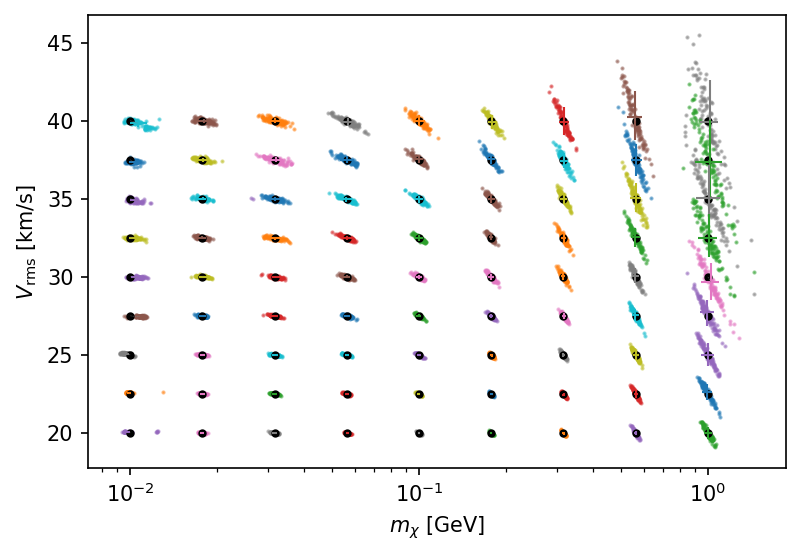

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os
import time

# colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

plt.figure(dpi=150)
N_point = 0
for filename in os.listdir("."):
    if filename[-4:] == ".npy":
        data = np.load(filename, mmap_mode='r')
        m_chi_averaged = np.average(data.T[0])
        V_rms_averaged = np.average(data.T[1])
        m_chi_real = float(filename.split('-')[0][5:])
        V_rms_real = float(filename.split('-')[1][5:-4])
        if m_chi_real > 1:
            continue
        # plt.scatter(data.T[0], data.T[1]/1000, s=1, label=r"N={}, $m_\chi$={}GeV, $Vrms$={}km/s".format(data.shape[0], m_chi_real, int(V_rms_real/1000)))
        print(f"{data.shape[0]} points; "+f"m,V=({m_chi_real}, {m_chi_averaged}), "+f"({int(V_rms_real)}, {V_rms_averaged})")
        plt.scatter(data.T[0], data.T[1]/1000, s=1, alpha=0.5)
        plt.scatter(m_chi_real, V_rms_real/1000, marker=".", c='k')
        # plt.scatter(m_chi_averaged, V_rms_averaged/1000, marker="v", c='g')
        xerr = np.percentile(data.T[0], [15.9,84.1])
        yerr = np.percentile(data.T[1], [15.9,84.1])
        xerr = abs(xerr-m_chi_averaged)
        yerr = abs(yerr-V_rms_averaged)
        # xerr = np.std(data.T[0])
        # yerr = np.std(data.T[1])
        # print("xerr =", xerr, "yerr =", yerr)
        plt.errorbar(m_chi_averaged, V_rms_averaged/1000, xerr=np.array([xerr]).T, yerr=np.array([yerr]).T/1000, linewidth=1)#, marker='+')
        plt.plot([m_chi_real, m_chi_averaged], [V_rms_real/1000, V_rms_averaged/1000], linewidth=0.2, linestyle='--', c='grey')
        N_point += 1
# plt.colorbar()
# plt.xlim(0, 0.15)
# plt.ylim(0,50)
# plt.title("least_squares-default_diff_step-100random_v_stream")
title = "least_squares-100p-48v-0.1diff_step-ares-ymax100-xmax1GeV"
# plt.title(title)
plt.xlabel(r"$m_{\chi}$ [GeV]")
plt.xscale('log')
# plt.yscale('log')
plt.ylabel(r"$V_{\rm rms}$ [km/s]")
# plt.ylim(0,60)
# plt.legend()
# plt.savefig(f"m_chi-V_rms-{time.time()}.png")
# plt.savefig(title+".png")
# plt.savefig("trunc")
plt.show()

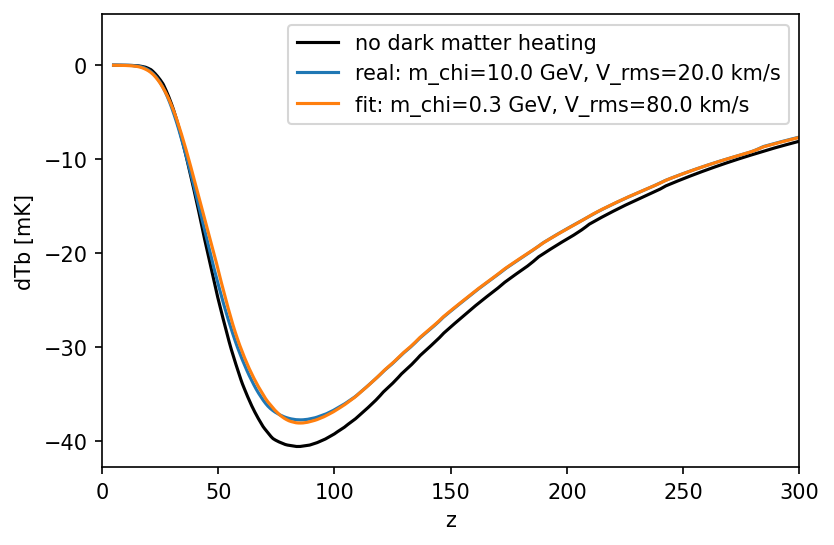

: 

In [5]:
import ares
import numpy as np
import matplotlib.pyplot as plt

output = (10.0, 0.2864686521901798), (20000, 79999.8699478584)
para_real, para_fit = np.array(output).T
data_real = np.load(f"./average_dTb-30-(10.0, 20000.0)/V_rms{para_real[1]}/m_chi{para_real[0]}_averaged.npy")
data_fit = np.load(f"./average_dTb-30-(10.0, 20000.0)/V_rms{para_fit[1]}/m_chi{para_fit[0]}_averaged.npy")

pf ={
        'radiative_transfer': False,
        'verbose': False,
        'dark_matter_heating': False,
        'include_cgm': False,
        # 'initial_v_stream':0,
        'initial_redshift': 1010,
        'include_He': True  # ,
        # 'dark_matter_mass': 1
    }
sim = ares.simulations.Global21cm(**pf)
sim.run()

plt.figure(dpi=150)
plt.plot(sim.history['z'], sim.history['dTb'], label="no dark matter heating", c='k')
plt.plot(data_real[0], data_real[1], label=f"real: m_chi={para_real[0]:.1f} GeV, V_rms={para_real[1]/1000:.1f} km/s")
plt.plot(data_fit[0], data_fit[1], label=f"fit: m_chi={para_fit[0]:.1f} GeV, V_rms={para_fit[1]/1000:.1f} km/s")
plt.xlim(0,300)
plt.xlabel("z")
plt.ylabel("dTb [mK]")
plt.legend()
plt.show()